## Nonlinear Supervised Learning Series

# Part 6: Gradient Boosting

Gradient boosting is a popular method for tree-based nonlinear supervised learning that works sequentially, adding individual trees greedily to a working model one at a time based on how well the improve an overall fit to the data.  A greedy form of *coordinate descent* lies at the heart of gradient boosting for the iterative selection of tree units, which are quite commonly just decision stumps (first discussed at a high level in the second post in this series).

In [2]:
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# 1.  Generating regression stumps

One of the simplest yet most common type of tree unit is the simple *decision stump* also known as a *depth-1 tree*.  Each stump unit is a piece-wise constant function consisting of two distinct levels, on which the function is constant, separated by a *split point*.  Mathematically we can express a generic stump as follows.

\begin{equation}
f(x) = \begin{cases} L_1 \,\,\,\,\,\text{if} \,\,\,\, x \leq s_1 \\ L_2 \,\,\,\,\, \text{if} \,\,\,\, x > s_1.   \end{cases}  ~~~~~~~~
\end{equation}

Here the split point is written as $s_1$, while the two levels of the stump are written as $L_1$ and $L_2$ respectively.  In their usage for nonlinear regression and classification these parameters of the stump are set with respect to a dataset.  When performing regression or classification with stumps often one generates a complete collection, each of which has its parameters fine-tuned to the particular dataset under study.  

Let us say we have a dataset of $P$ points $\left \{x_p,y_p \right \}_{p=1}^{P}$ where the input has just a single dimension.  A naive (yet common) way of generating stumps for this dataset goes as follows: we create a stump with split point midway between each successive pairs of inputs, and then set the corresponding levels to the average of the outputs to the left and right of the split point respectively.  

We animate this process of stump generation with an example dataset in the next Python cell.  As you move the slider from left to right each increment the next stump is drawn.  For a dataset of $P$ points with single dimensional input like this we create a total of $P-1$ stumps this way.


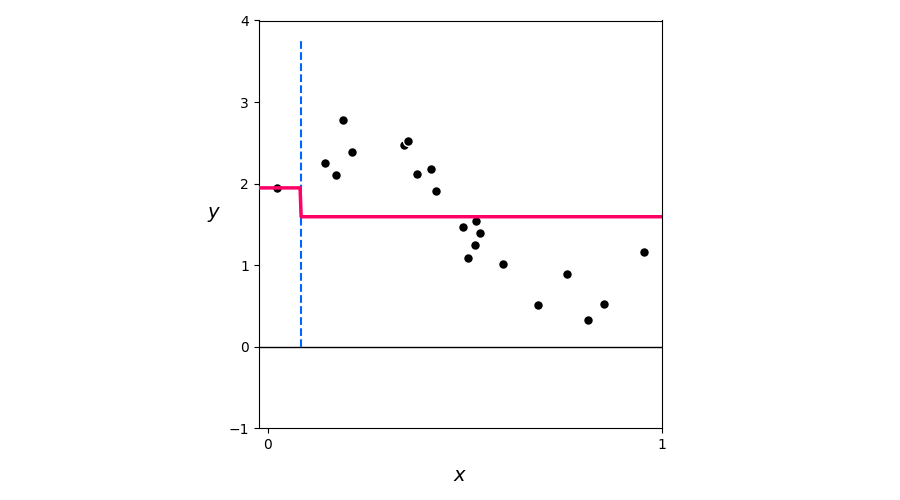
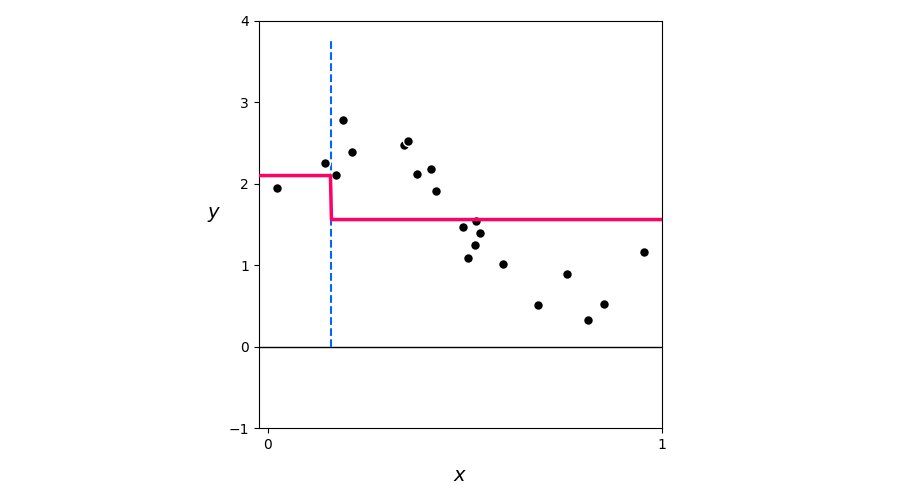
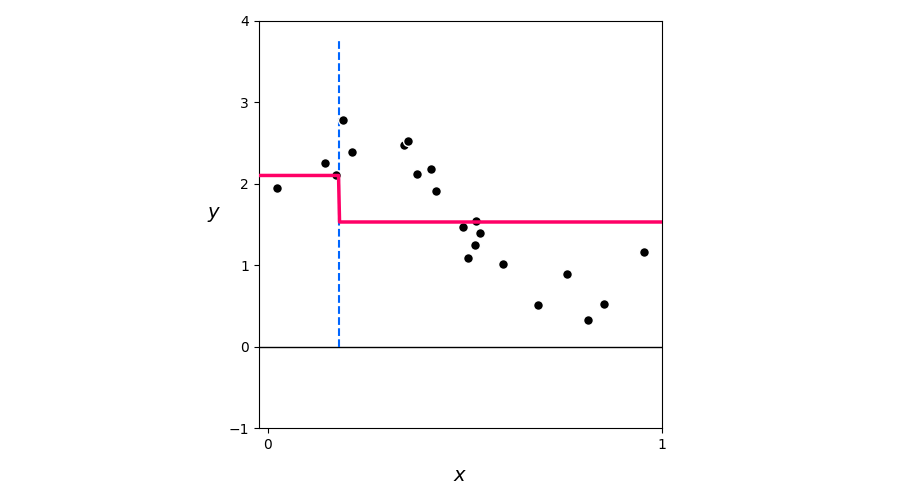
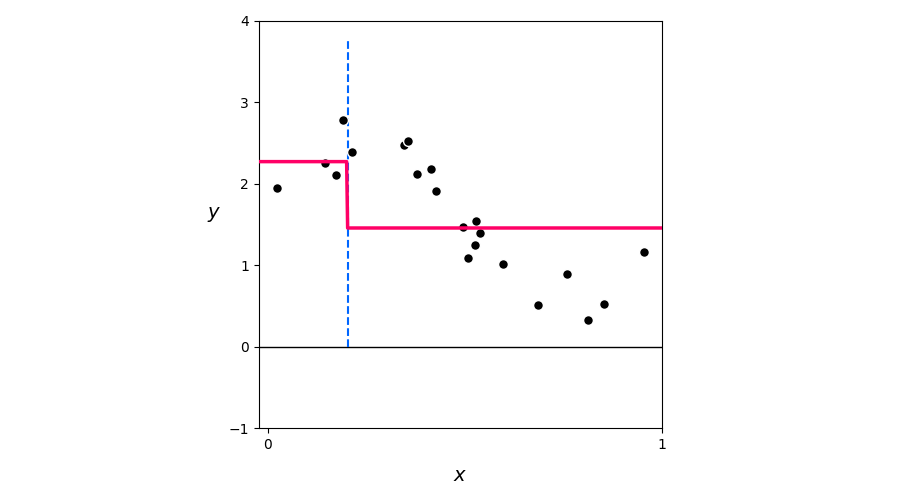
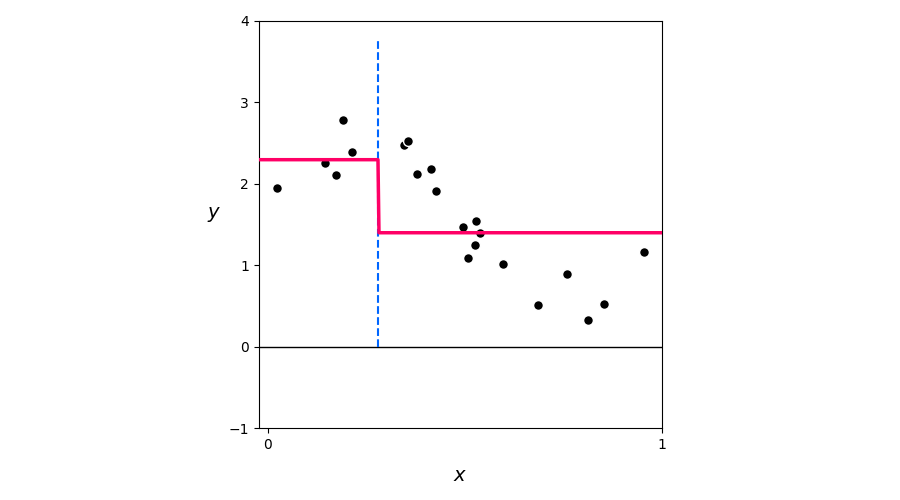
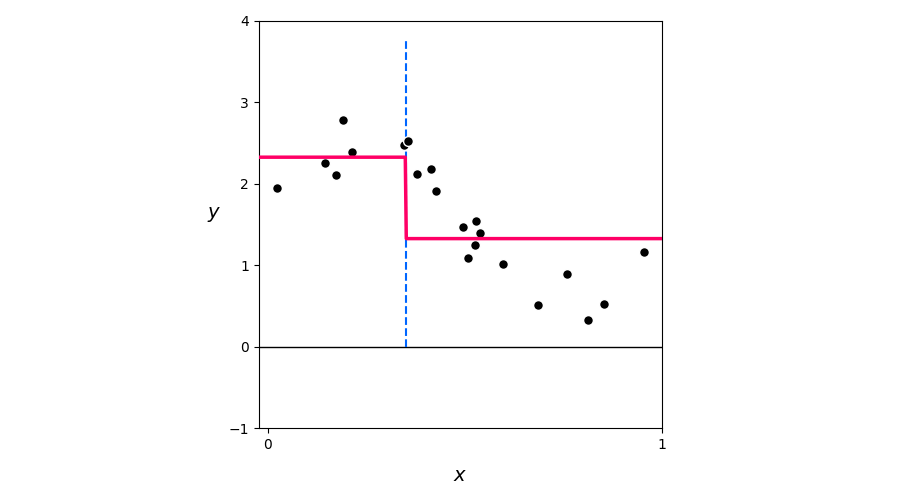
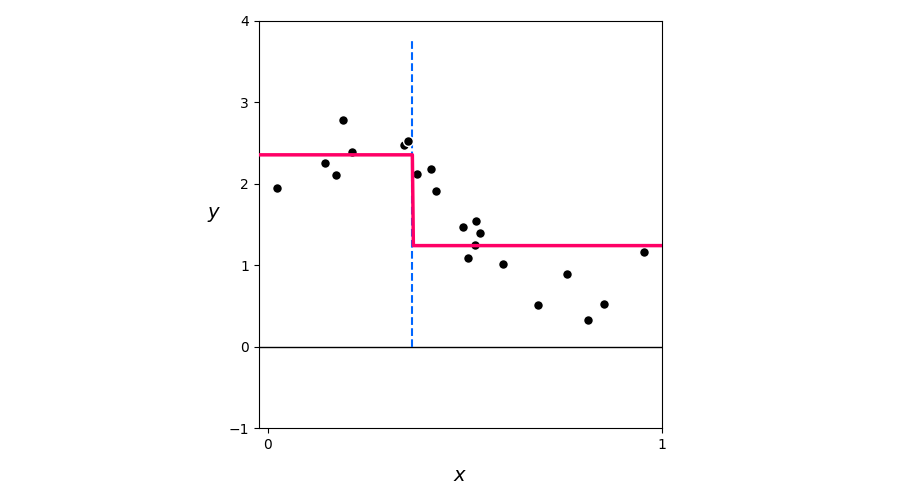
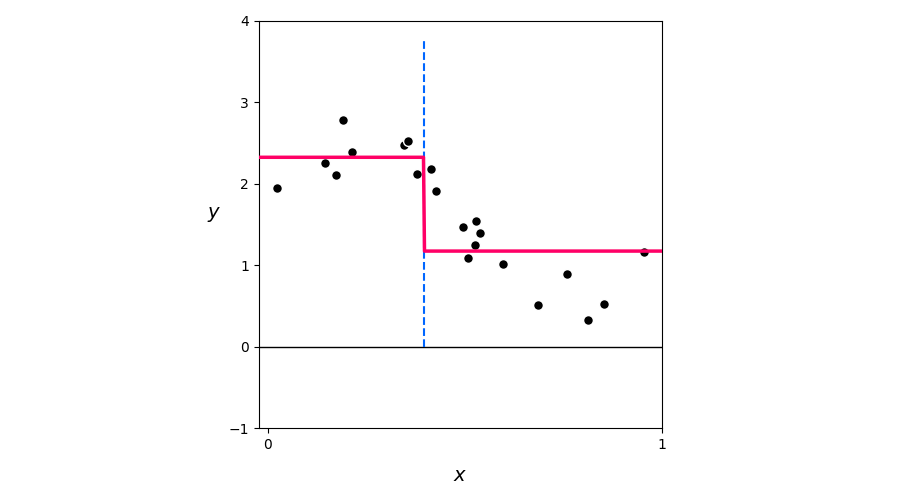
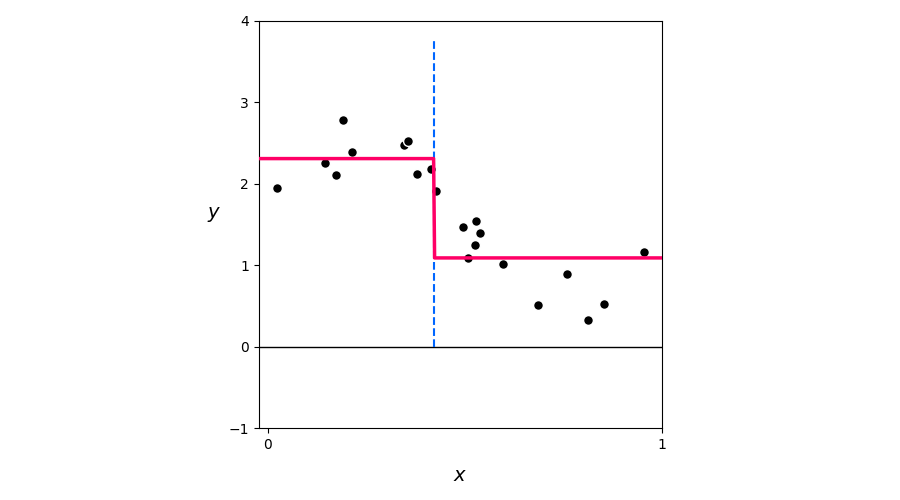
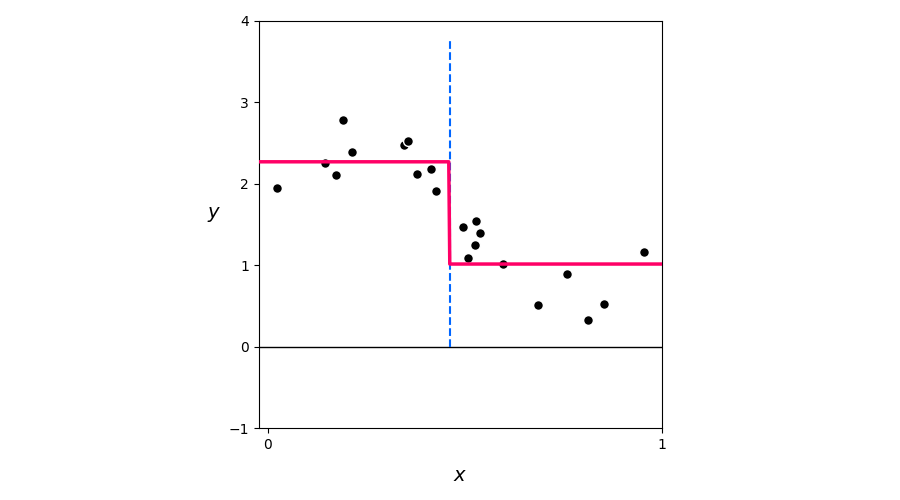
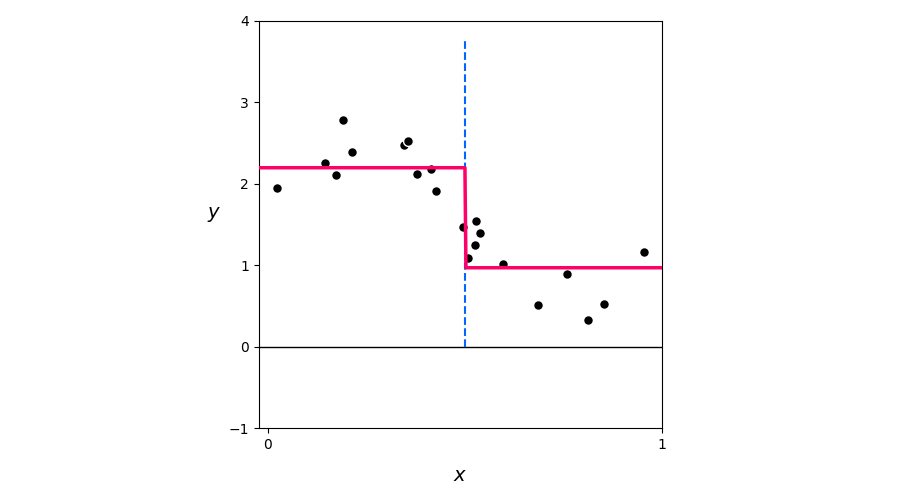
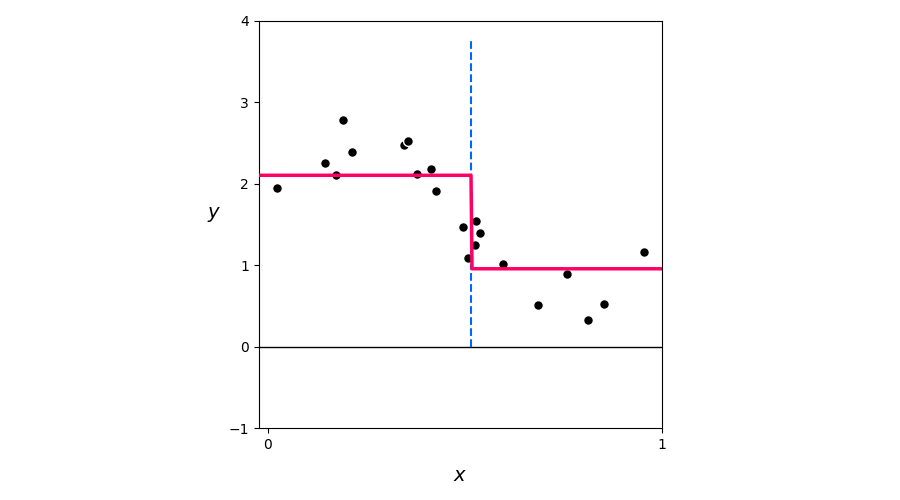
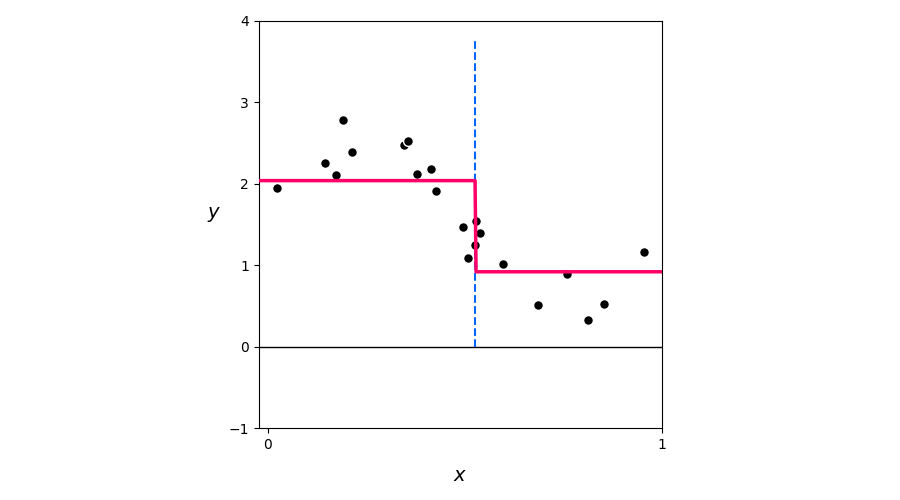
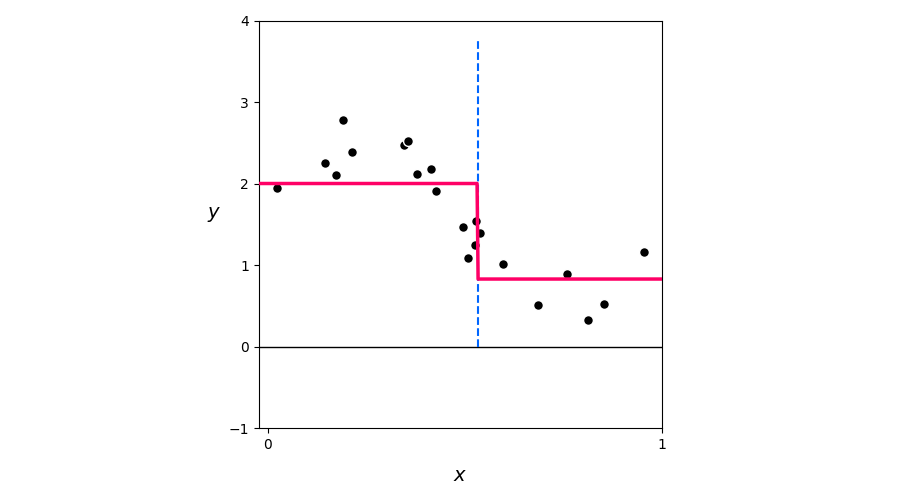
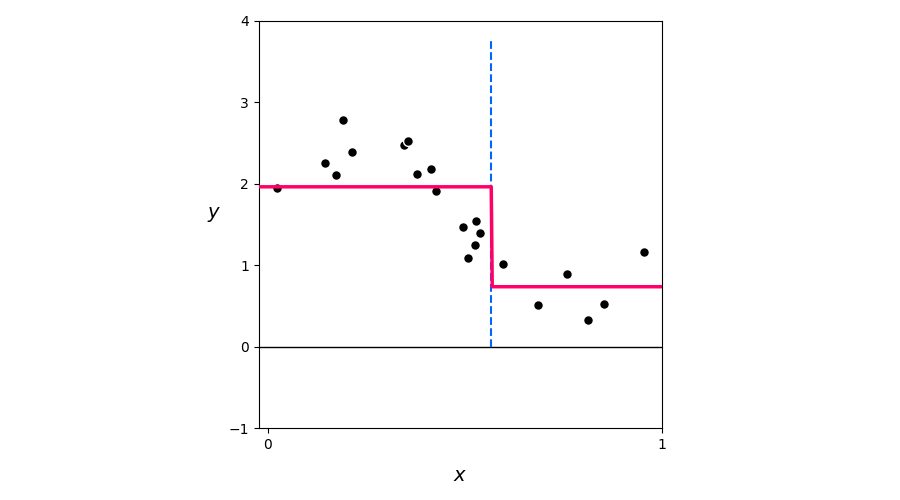
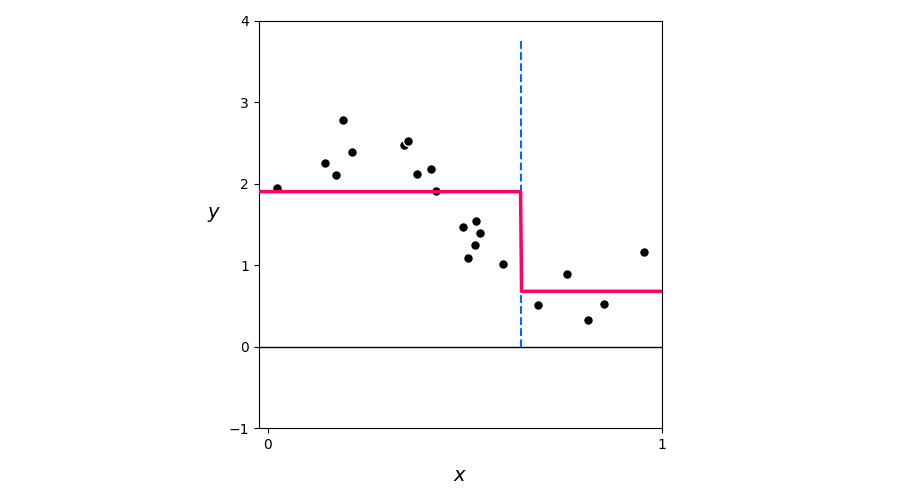
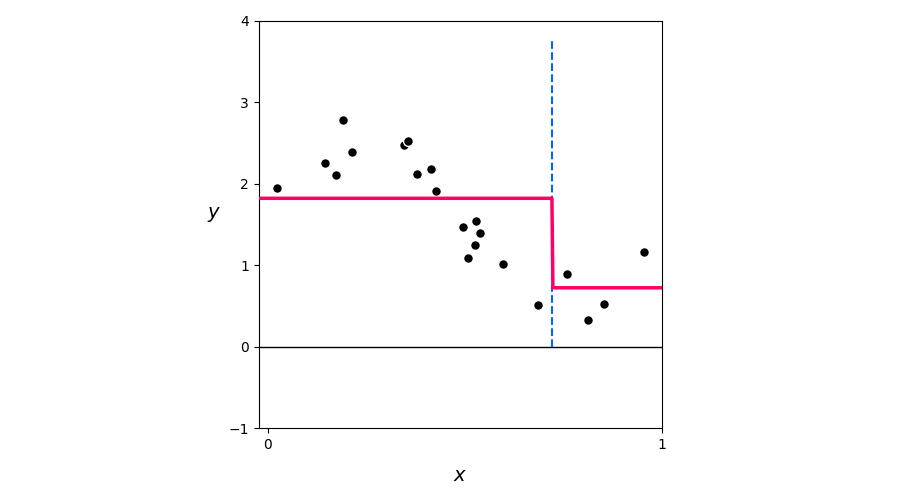
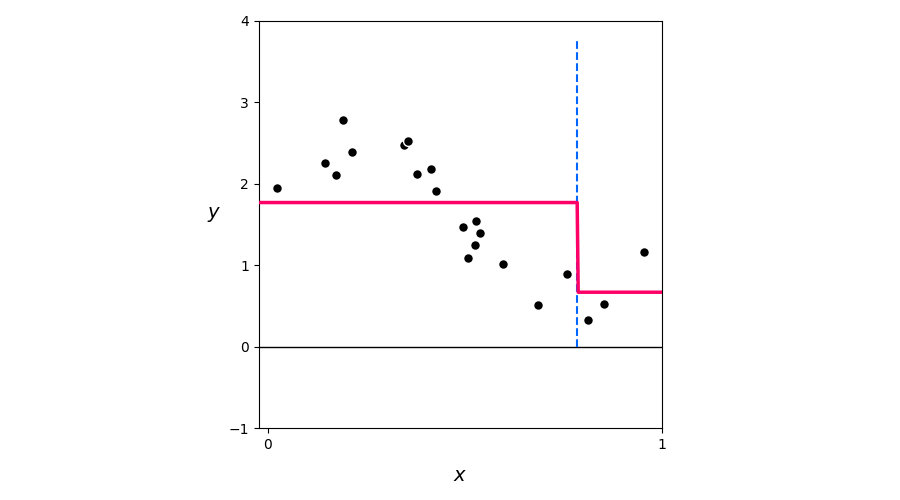
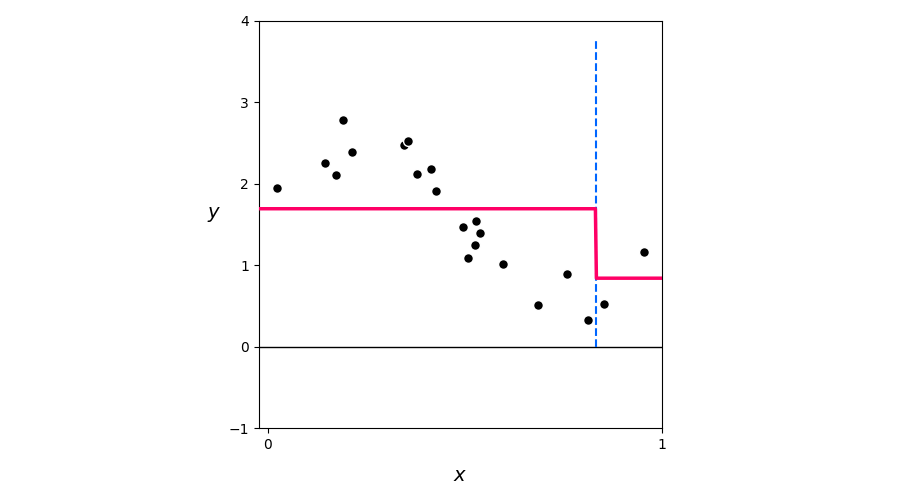
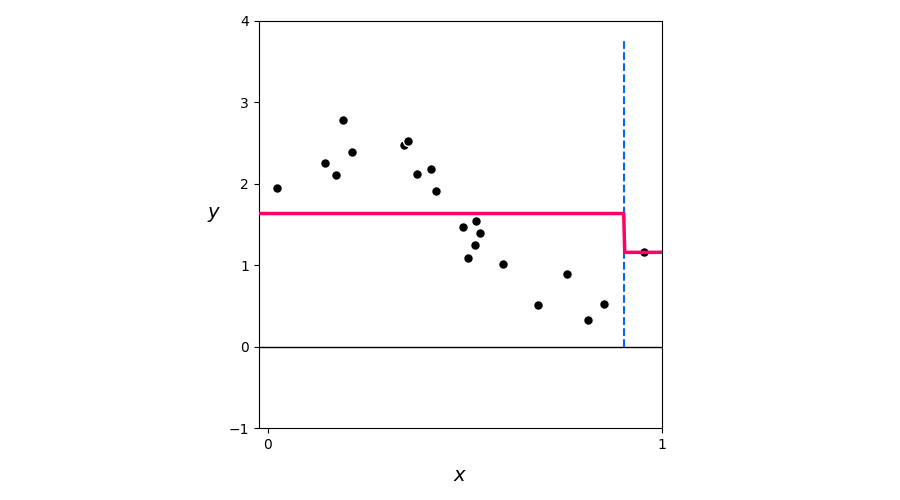

In [8]:
# animate stump collection for a sample dataset
demo = nonlib.stump_visualizer_2d.Visualizer()
csvname = datapath + 'noisy_sin_raised.csv'
demo.load_data(csvname)
demo.browse_stumps()

Mathematically we can write the $p^{th}$ stump as 

\begin{equation}
f_p(x) = \begin{cases} L_{p,1} \,\,\,\,\,\text{if} \,\,\,\, x \leq s_{p} \\ L_{p,2} \,\,\,\,\, \text{if} \,\,\,\, x > s_{p}.   \end{cases}  ~~~~~~~~
\end{equation}

whose split point is given as

\begin{equation}
s_p = \frac{x_p + x_{p+1}}{2}
\end{equation}

and corresponding levels computed as 

\begin{array}
\
L_{p,1} = \text{mean}\left\{y_j  \left.\phantom{\frac{.}{.}}\right\vert \,\,\, x_j \leq s_p\right\}\\
L_{p,2} = \text{mean}\left\{y_j \left.\phantom{\frac{.}{.}}\right\vert  \,\,\, x_j > s_p \right\}\\
\end{array}

Note: when we are dealing with a classification dataset we need only build a stump where successive points belong to two distinct classes, or in other words place a split point in between two successive points if they belong to different classes.  We illustrate this below on a toy nonlinear classification dataset with single dimensional input.


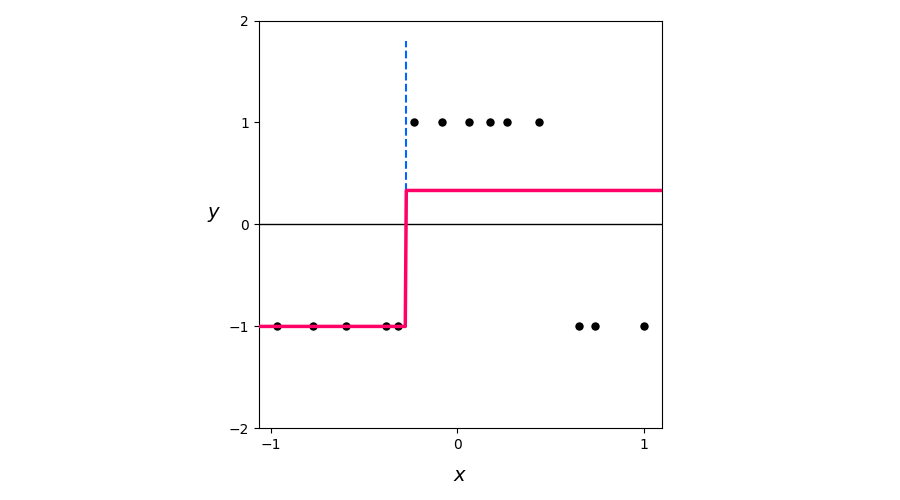
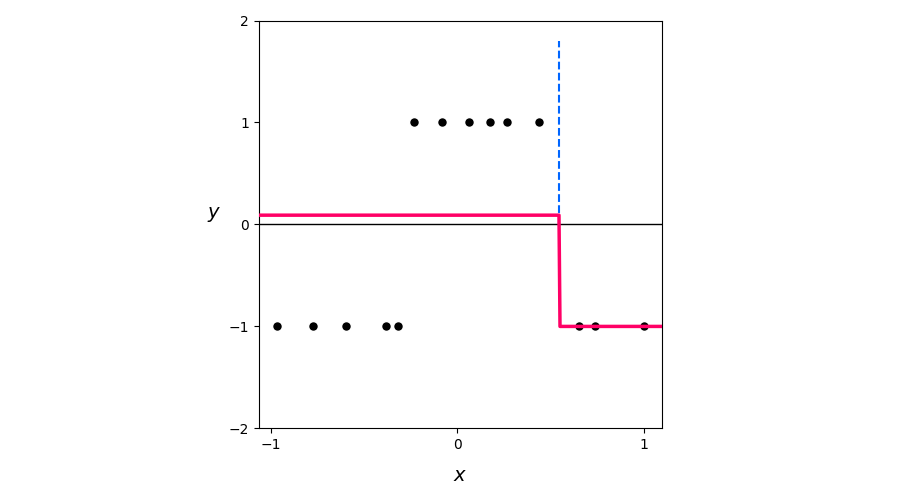

In [6]:
# animate stump collection for a sample dataset
demo = nonlib.stump_visualizer_2d.Visualizer()
csvname = datapath + 'signed_projectile.csv'
demo.load_data(csvname)
demo.browse_stumps()

Finally note more generally that for data whose input is $N$ dimensional we generate stumps like this along *each input dimension*.

# 1.  Gradient boosting for regression